In [6]:
from IPython.display import Image, display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import ROOT as r
import array
import os
import sys
#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________

import PLOTTING

In [15]:

config="2"
fileDIR=(f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root")
resolved_path = os.path.abspath(fileDIR)
print(f"Resolved Path: {resolved_path}")
print(f"File Exists: {os.path.exists(resolved_path)}")



def dxy(rootfile):
    
    # Create a TChain and add the input ROOT file
    chain = r.TChain("Tout")
    chain.Add(rootfile)
    bins=150
    # Create histograms
    h2 = r.TH2F("h2", "dX vs dY", bins, -4, 4, bins, -4, 4)
    h3 = r.TH2F("h3", "dX vs dY 0<W2<1.3", bins, -4, 4, bins, -4, 4)

    # Define variables to hold branch values using arrays
    dx = array.array('d', [0])
    dy = array.array('d', [0])
    W2 = array.array('d', [0])

    # Set branch addresses
    chain.SetBranchStatus("*", 0)
    chain.SetBranchStatus("dx", 1)
    chain.SetBranchStatus("dy", 1)
    chain.SetBranchStatus("W2", 1)
    chain.SetBranchAddress("dx", dx)
    chain.SetBranchAddress("dy", dy)
    chain.SetBranchAddress("W2", W2)

    # Loop over all entries and fill histograms
    nEntries = chain.GetEntries()
    print(nEntries)
    for i in range(nEntries):
        chain.GetEntry(i)
        h2.Fill(dy[0], dx[0])
        if 0 < W2[0] < 1.3:
            h3.Fill(dy[0], dx[0])

    # Write histograms to the file
    h2.Write()
    h3.Write()

    # Create a canvas and save the histogram as an image
    c2 = r.TCanvas("c2", "dX vs dY", 1000, 1000)
    r.gStyle.SetPalette(r.kRainBow)
    h2.Draw("colz")
    #c2.SaveAs("../plots/dxdy.png")

    # Create another canvas and save the second histogram as an image
    c3 = r.TCanvas("c3", "dX vs dY 0<W2<1.3", 1000, 1000)
    h3.Draw("colz")
    r.gStyle.SetPalette(r.kRainBow)
    #c3.SaveAs("../plots/dxdyCut.png")

    print("it worked")
    return h2, h3
# Example usage


Resolved Path: /home/research/GEn/GEn Data Analysis/outfiles/Pass1/QE_data_GEN2_sbs100p_nucleon_np_model2.root
File Exists: True


In [16]:
h2,h3=dxy(fileDIR)

26002792
it worked


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).
Error in <TROOT::WriteTObject>: The current directory (PyROOT) is not associated with a file. The object (h2) has not been written.
Error in <TROOT::WriteTObject>: The current directory (PyROOT) is not associated with a file. The object (h3) has not been written.


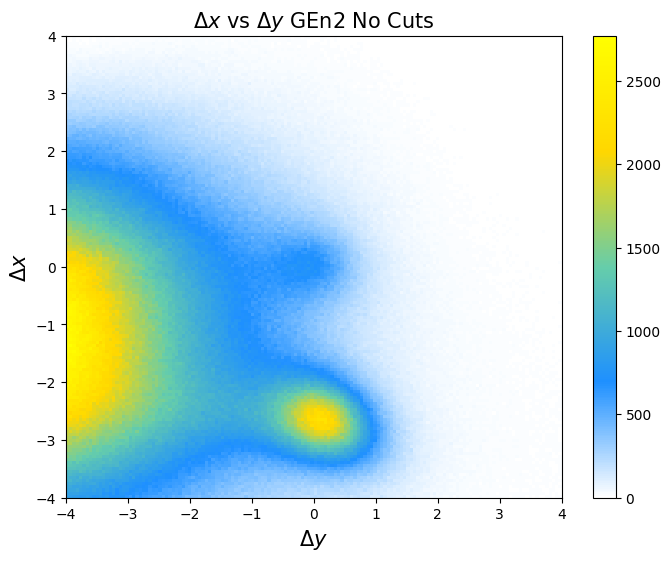

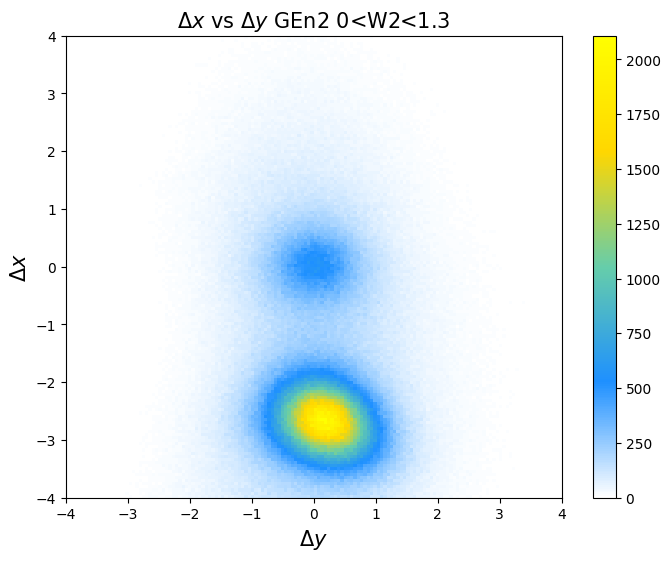

In [17]:


# Assuming h2 and h3 are your ROOT histograms

PLOTTING.Function_PLOT2DROOTHIST(h2, r'$\Delta x$ vs $\Delta y$ GEn' + config +' No Cuts', f'../plots/dxdy{config}.png')
PLOTTING.Function_PLOT2DROOTHIST(h3, r'$\Delta x$ vs $\Delta y$ GEn' + config +' 0<W2<1.3', f'../plots/dxdyCut{config}.png')


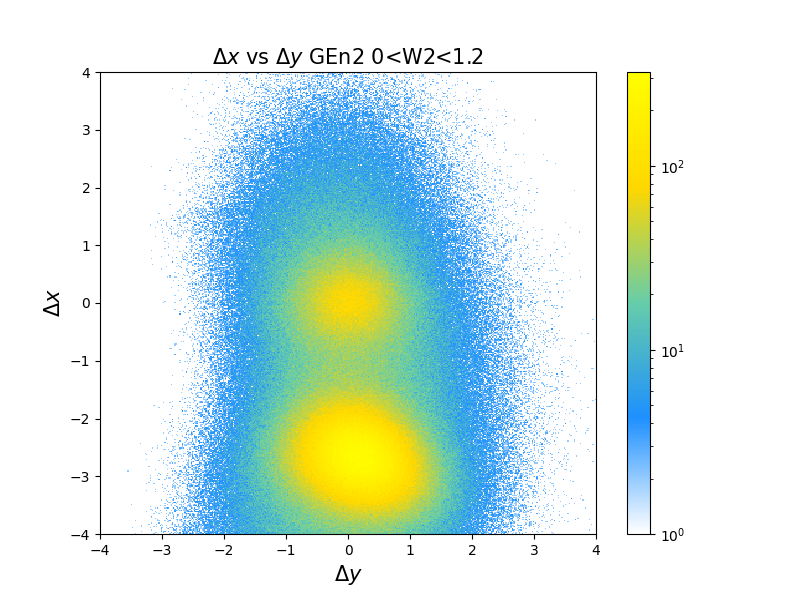

In [10]:
display(Image(filename="../plots/dxdyCut2.png"))